<a href="https://colab.research.google.com/github/SergioManuelJob/ReconocimientoFlores/blob/master/modeloConvolucional_Flores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import PIL
import cv2

## Cargamos el dataset.

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

dataset_dir = keras.utils.get_file(fname = 'flower_photos' , origin = dataset_url , cache_dir='.',untar=True)

In [3]:
import pathlib

datadir = pathlib.Path(dataset_dir)
datadir

PosixPath('datasets/flower_photos')

## Dividimos las imágenes de las flores por el directorio en el que se encuentran, y las guardamos en carpetas separadas.

In [4]:
flowers = {'daisy' : list(datadir.glob("daisy/*")),
'dandelion' : list(datadir.glob("dandelion/*")),
'roses' : list(datadir.glob("roses/*")),
'sunflowers' : list(datadir.glob("sunflowers/*")),
'tulips' : list(datadir.glob("tulips/*"))}

labels = {
    'daisy' : 0 ,
    'dandelion' : 1 ,
    'roses' : 2,
    'sunflowers' : 3 ,
    'tulips' :4
}

## Mostramos cada una de las imágenes para ver que esté bien clasificado.

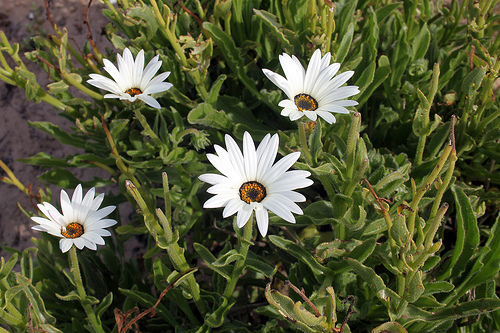

In [12]:
PIL.Image.open(str(flowers['daisy'][0]))

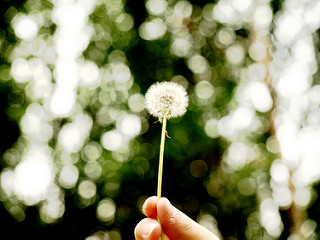

In [13]:
PIL.Image.open(str(flowers['dandelion'][0]))

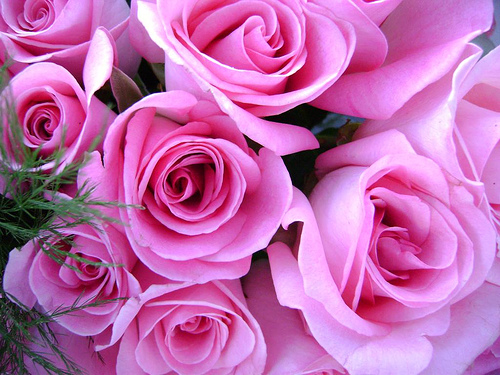

In [14]:
PIL.Image.open(str(flowers['roses'][0]))

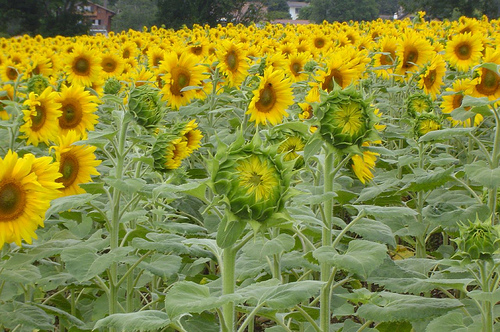

In [15]:
PIL.Image.open(str(flowers['sunflowers'][0]))

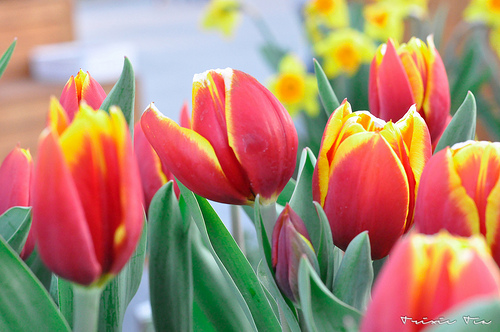

In [16]:
PIL.Image.open(str(flowers['tulips'][0]))

Redimensionamos las imagenes a 224x224, y las metemos redimensionadas en la X, y las etiquetas en la Y.

In [5]:
x =[]
y = []

for image_name , image in flowers.items():
  for img in image :
    img = cv2.imread(str(img))
    resized = cv2.resize(img , (224,224))
    x.append(resized)
    y.append(labels[image_name])

Lo convertimos a array de numpy.

In [6]:
x = np.array(x)
y = np.array(y)

Dividimos entre train y test, diviendolos equitativamente por la cantidad de etiquetas (stratify).

In [7]:
x_train , x_test , y_train , y_test  = train_test_split(x,y , test_size=.2 , stratify = y)

Y escalamos los datos.

In [8]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

## Creamos el modelo, añadiendo las distintas capas de neuronas, entre ellas añadiendo dos capas de dropout de 0.2 para no tener overfitting, muy importante ya que hemos aumentado los datos. La capa de aumentado de datos la ponemos al principio, y la entrada de salida tiene las mismas neuronas que nosotros flores (5).

In [9]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters = 16,kernel_size = (3,3) , activation = 'relu',padding = 'same'),
    keras.layers.MaxPool2D((3,3)),
    keras.layers.Conv2D(filters = 32,kernel_size = (3,3) , activation = 'relu'),
    keras.layers.MaxPool2D((3,3)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(filters = 64,kernel_size = (3,3) , activation = 'relu',padding = 'same'),
    keras.layers.MaxPool2D((3,3)),
    keras.layers.Conv2D(filters = 128,kernel_size = (3,3) , activation = 'relu',padding = 'same'),
    keras.layers.MaxPool2D((3,3)),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dense(32,activation = 'relu'),
    keras.layers.Dense(5,activation = 'softmax')
])

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(x_train_scaled,y_train , epochs = 30)

In [ ]:
model.evaluate(x_test_scaled,y_test)

In [4]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 954.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 60.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 29.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0
  Attempting uninstall: ml-dtypes
  

In [5]:
!mkdir carpeta_salida

In [6]:
!tensorflowjs_converter --input_format keras reconocedor_flor.h5 carpeta_salida

2024-04-27 16:54:51.857798: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-27 16:54:53.700823: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
failed to lookup keras version from the file,
    this is likely a weight only file


In [7]:
!ls carpeta_salida

group1-shard1of1.bin  model.json
